## **1. data upload**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving (스마트팜)참외농장 내부 환경변화에 따른 생육 데이터_데이터.xlsx to (스마트팜)참외농장 내부 환경변화에 따른 생육 데이터_데이터 (1).xlsx


In [ ]:
import pandas as pd
df = pd.read_excel("(스마트팜)참외농장 내부 환경변화에 따른 생육 데이터_데이터.xlsx")

In [ ]:
df

,FARM_ID,MSRM_DT,AREA_NM,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,SPICES_NM_1,SPICES_NM_2,SPICES_NM_3,HOUSE_QLFMT_CONT,HOUSE_TYPE,PLANT_AR_SQM,INDVD_NO,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,GBE_KRMLN_0030000g,2020-01-01 00:00:00,성주,14.1,63.0,776.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
1,GBE_KRMLN_0030000g,2020-01-01 01:00:00,성주,13.6,65.9,744.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
2,GBE_KRMLN_0030000g,2020-01-01 02:00:00,성주,12.9,67.3,725.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
3,GBE_KRMLN_0030000g,2020-01-01 03:00:00,성주,12.7,67.3,766.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
4,GBE_KRMLN_0030000g,2020-01-01 04:00:00,성주,12.0,64.3,774.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,GBE_KRMLN_0030000g,2020-12-31 19:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
11012,GBE_KRMLN_0030000g,2020-12-31 20:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
11013,GBE_KRMLN_0030000g,2020-12-31 21:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
11014,GBE_KRMLN_0030000g,2020-12-31 22:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측값 확인
df.isnull().sum()

,0
FARM_ID,0
MSRM_DT,0
AREA_NM,0
INNER_TPRT,3445
INNER_HMDT,4064
INNER_CBDX_CTRN,5229
SPICES_NM_1,0
SPICES_NM_2,11016
SPICES_NM_3,11016
HOUSE_QLFMT_CONT,0


## **2. data preprocessing**

#### **2.1 생육 상태의 주기적 시점 문제 분석**

**생육 상태 값이 존재하는 날짜 추출**
- 8월까지 밖에 값이 없음 -> 9월 이후부터의 행은 제거하기로 결정

In [ ]:
# 생육 상태 변수 중 하나라도 값이 존재하는 행 필터링
growth_features = ['PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
df_growth_present = df.dropna(subset=growth_features, how='all')

# 측정일 날짜 추출 (중복 제거)
# 측정일 날짜 추출 (시간 제외하고 "MM-DD" 형식으로 변환)
dates_with_growth_data = pd.to_datetime(df_growth_present['MSRM_DT']).dt.strftime('%m-%d').drop_duplicates().sort_values()
dates_with_growth_data

,MSRM_DT
48,01-03
216,01-07
456,01-14
696,01-21
936,01-28
1176,02-04
1416,02-11
1656,02-18
1896,02-25
2136,03-03


In [ ]:
dates_with_growth_data.shape

(31,)

**날짜 간 차이 계산**

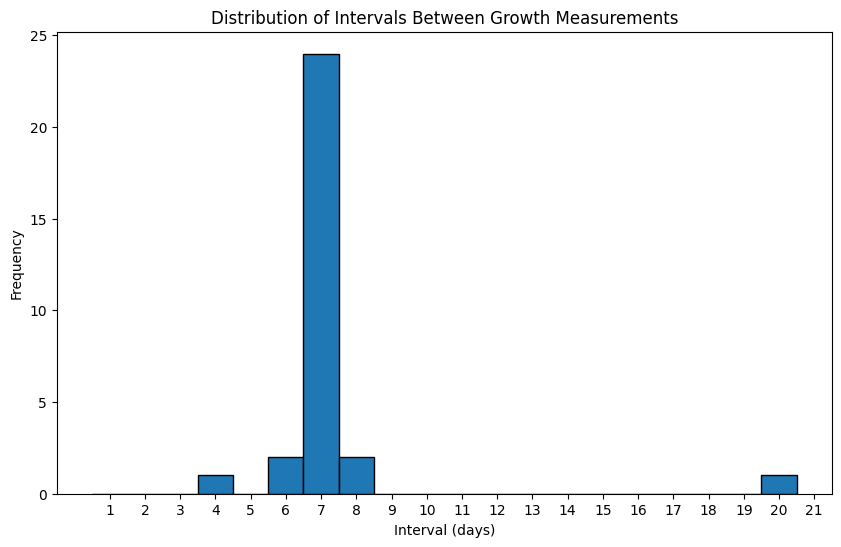

In [ ]:
import matplotlib.pyplot as plt

# 측정일 날짜 추출 (시간 제외하고 중복 제거, 날짜 형식 유지)
dates_with_growth_data = pd.to_datetime(df_growth_present['MSRM_DT']).dt.normalize().drop_duplicates().sort_values()

# 날짜 간의 차이 계산
date_diffs = dates_with_growth_data.diff().dropna().dt.days

# 날짜 간의 차이 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(date_diffs, bins=range(1, date_diffs.max() + 1), edgecolor='black', align='left')
plt.xlabel("Interval (days)")  # 날짜 간격 (일 단위
plt.ylabel("Frequency")  # 빈도수
plt.title("Distribution of Intervals Between Growth Measurements")  # 생육 상태가 측정된 날짜 간의 간격 분포
plt.xticks(range(1, date_diffs.max() + 1))  # x축 눈금을 1일 간격으로 설정
plt.show()

**그래프를 통한 해석**:대부분의 측정이 7일 간격으로 이루어졌으므로, 생육 상태 측정이 정기적인 주기(1주)로 이루어진 데이터라고 해석됨.

**9월 이후의 데이터 제거**

In [ ]:
# 'MSRM_DT' 열을 날짜 형식으로 변환
df['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])

# 9월 이후의 데이터 제거
df_filtered = df[df['MSRM_DT'].dt.month < 9]

In [ ]:
df_filtered

,FARM_ID,MSRM_DT,AREA_NM,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,SPICES_NM_1,SPICES_NM_2,SPICES_NM_3,HOUSE_QLFMT_CONT,HOUSE_TYPE,PLANT_AR_SQM,INDVD_NO,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,GBE_KRMLN_0030000g,2020-01-01 00:00:00,성주,14.1,63.0,776.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
1,GBE_KRMLN_0030000g,2020-01-01 01:00:00,성주,13.6,65.9,744.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
2,GBE_KRMLN_0030000g,2020-01-01 02:00:00,성주,12.9,67.3,725.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
3,GBE_KRMLN_0030000g,2020-01-01 03:00:00,성주,12.7,67.3,766.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
4,GBE_KRMLN_0030000g,2020-01-01 04:00:00,성주,12.0,64.3,774.0,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8083,GBE_KRMLN_0030000g,2020-08-31 19:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
8084,GBE_KRMLN_0030000g,2020-08-31 20:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
8085,GBE_KRMLN_0030000g,2020-08-31 21:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN
8086,GBE_KRMLN_0030000g,2020-08-31 22:00:00,성주,NaN,NaN,NaN,알찬꿀,NaN,NaN,비닐,단동,16500,NaN,NaN,NaN,NaN,NaN


#### **2.2 결측치 처리를 위한 데이터 전처리**

**[df_selected] 필요한 feature들만 선택**
- 입력 변수: 내부 환경 변수(['INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN'])
- 출력 변수: 생육 상태 변수(['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS'])
- 'PLT_LNGTH'는 다른 데이터셋에서도 값이 아예 없거나 거의 결측치라 제외함

In [ ]:
# 입력 변수와 출력 변수(생육 상태 변수) 분리
env_features = ['INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']
growth_features = ['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']

In [ ]:
# df_filtered에서 필요한 열만 선택 (MSRM_DT, 입력 변수, 생육 상태 변수)
selected_features = ['MSRM_DT'] + env_features + growth_features
df_selected = df_filtered[selected_features].copy()

In [ ]:
df_selected

,MSRM_DT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,2020-01-01 00:00:00,14.1,63.0,776.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,13.6,65.9,744.0,NaN,NaN,NaN
2,2020-01-01 02:00:00,12.9,67.3,725.0,NaN,NaN,NaN
3,2020-01-01 03:00:00,12.7,67.3,766.0,NaN,NaN,NaN
4,2020-01-01 04:00:00,12.0,64.3,774.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8083,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8084,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8085,2020-08-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8086,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN


**[df_grouped] 입력 변수와 출력 변수 모두에 대해 MSRM_DT 기준으로 평균 계산을 통해  측정일 중복 제거**
> 측정일 중복 제거한 데이터셋: `df_grouped`  
> 측정일 중복 제거하면 -> 행 개수가 **5856**이어야 함

- 개체번호(INDVD_NO) 1,2,3,4로 인해 측정일이 중복됨
- 이를 해결하기 위해 동일 측정일에 대해서 각 개체번호별 생육 상태 변수(출력 변수) 값을 평균 내는 방식으로 측정일 중복을 제거함
- 내부 환경 변수(입력 변수)는 동일 측정일에 대해서 각 개체번호별 값이 동일하기 때문에 마찬가지로 평균을 내는 동일한 메트릭으로 중복을 제거함

In [ ]:
# MSRM_DT 기준으로 입력 변수와 출력 변수의 평균 계산
df_grouped = df_selected.groupby('MSRM_DT', as_index=False).mean()

In [ ]:
df_grouped

,MSRM_DT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,2020-01-01 00:00:00,14.1,63.0,776.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,13.6,65.9,744.0,NaN,NaN,NaN
2,2020-01-01 02:00:00,12.9,67.3,725.0,NaN,NaN,NaN
3,2020-01-01 03:00:00,12.7,67.3,766.0,NaN,NaN,NaN
4,2020-01-01 04:00:00,12.0,64.3,774.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5851,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
5852,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
5853,2020-08-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
5854,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN


#### **2.3 입력 변수 - 결측치 처리 방법 선택**

**MissForest**
- 랜덤 포레스트를 기반으로 결측치를 반복적으로 예측하여 대체하는 방법
- 비선형적 데이터 패턴 잘 반영함
- 단점: 결측치 비율이 높아도 대체가 가능하지만, **결측치 비율이 70% 이상일 경우 성능이 저하될 수 있음**


In [ ]:
df_grouped.isnull().sum()

,0
MSRM_DT,0
INNER_TPRT,469
INNER_HMDT,929
INNER_CBDX_CTRN,1755
LEAF_LNGTH,5112
LEAF_WDTH,5112
STEM_THNS,5112


- INNER_TPRT와 INNER_HMDT의 결측치는 비교적 적은 편이며, INNER_CBDX_CTRN의 결측치는 약 30% 정도의 비율을 차지함
- LEAF_LNGTH, LEAF_WDTH, STEM_THNS는 전체의 약 87%에 해당하는 결측치가 있어 매우 높음

**입력 변수만 MissForest로 대체하자**
- 입력 변수의 결측치는 MissForest를 사용해 처리하고, 출력 변수의 결측치는 다른 방법으로 처리할 예정
- problem) `missingpy`가 `scikit-learn`의 특정 버전에서만 작동하기 때문에 버전 문제로 사용 불가능함
- sol) `IterativeImputer` 사용

**IterativeImputer 사용 시 고려사항**
- **각 변수 간의 상관관계를 학습**하여 결측치를 대체하는 방식임
- **단점: 시계열의 시간적 순서나 연속성을 명시적으로 고려하지는 않음**

**입력 변수 간 상관관계 확인**
- 입력 변수 간 상관관계가 높다면 -> IterativeImputer 사용
- 입력 변수 간 상관관계가 낮다면 -> 다른 결측치 처리 방법 사용

상관계수 행렬:
                 INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
INNER_TPRT         1.000000   -0.674886        -0.457792
INNER_HMDT        -0.674886    1.000000         0.265326
INNER_CBDX_CTRN   -0.457792    0.265326         1.000000


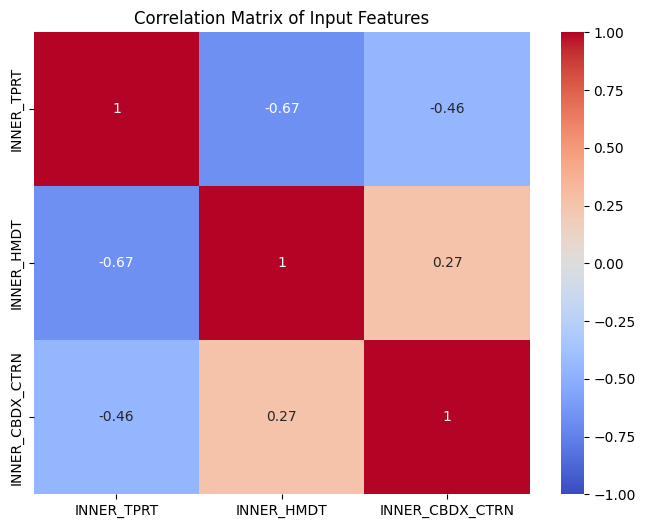

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 입력 변수들만 선택하여 상관계수 계산
correlation_matrix = df_grouped[env_features].corr()

# 상관계수 행렬 출력
print("상관계수 행렬:")
print(correlation_matrix)

# 히트맵을 통해 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Input Features")
plt.show()

> **상관관계 판단 기준**
> - 상관계수가 0.7 이상: 강한 양의 상관관계
> - 상관계수가 -0.7 이하: 강한 음의 상관관계
> - 상관계수가 0.3 ~ 0.7: 중간 정도의 상관관계
> - 상관계수가 0.3 이하: 약한 상관관계

**결론**
- 입력 변수 간 상관관계가 높지 않음
- sol) 시계열의 시간적 특성을 반영하는 Time Interpolation과 Spline Interpolation 중에 하나를 사용하자.
- Time Interpolation은 선형 보간이기 때문에, 비선형 보간인 **스플라인 보간을 사용**하기로 결정함 (스플라인 보간은 인덱스 순서에 의존함)

#### **2.4 입력 변수 - 스플라인 보간 + 전후 값 보간법으로 결측치 처리**

1. **전후값 보간**을 먼저 적용하여 긴 결측 구간을 채운 후
2. 남은 짧은 결측 구간에 대해 **스플라인 보간** 적용

In [ ]:
# 1. 전후값 보간 (긴 결측 구간을 먼저 채움)
df_grouped[env_features] = df_grouped[env_features].ffill().bfill()

# 2. 스플라인 보간 (남은 짧은 결측 구간을 부드럽게 채움)
df_grouped[env_features] = df_grouped[env_features].interpolate(method='spline', order=3)

In [ ]:
df_grouped

,MSRM_DT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,2020-01-01 00:00:00,14.1,63.0,776.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,13.6,65.9,744.0,NaN,NaN,NaN
2,2020-01-01 02:00:00,12.9,67.3,725.0,NaN,NaN,NaN
3,2020-01-01 03:00:00,12.7,67.3,766.0,NaN,NaN,NaN
4,2020-01-01 04:00:00,12.0,64.3,774.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5851,2020-08-31 19:00:00,35.3,63.5,575.0,NaN,NaN,NaN
5852,2020-08-31 20:00:00,35.3,63.5,575.0,NaN,NaN,NaN
5853,2020-08-31 21:00:00,35.3,63.5,575.0,NaN,NaN,NaN
5854,2020-08-31 22:00:00,35.3,63.5,575.0,NaN,NaN,NaN


In [ ]:
# 결과 확인
print("입력 변수의 보간 후 결측치 개수:")
df_grouped.isnull().sum()

입력 변수의 보간 후 결측치 개수:


,0
MSRM_DT,0
INNER_TPRT,0
INNER_HMDT,0
INNER_CBDX_CTRN,0
LEAF_LNGTH,5112
LEAF_WDTH,5112
STEM_THNS,5112


#### **2.5 출력 변수 - 결측치 처리 방법 선택**

생육 상태 변수가 시간에 따라 자연스럽게 변동하는지 아니면 복잡한 패턴을 가지고 있는지 확인함으로써 적절한 결측치 보간 방법을 선택하고자 함.

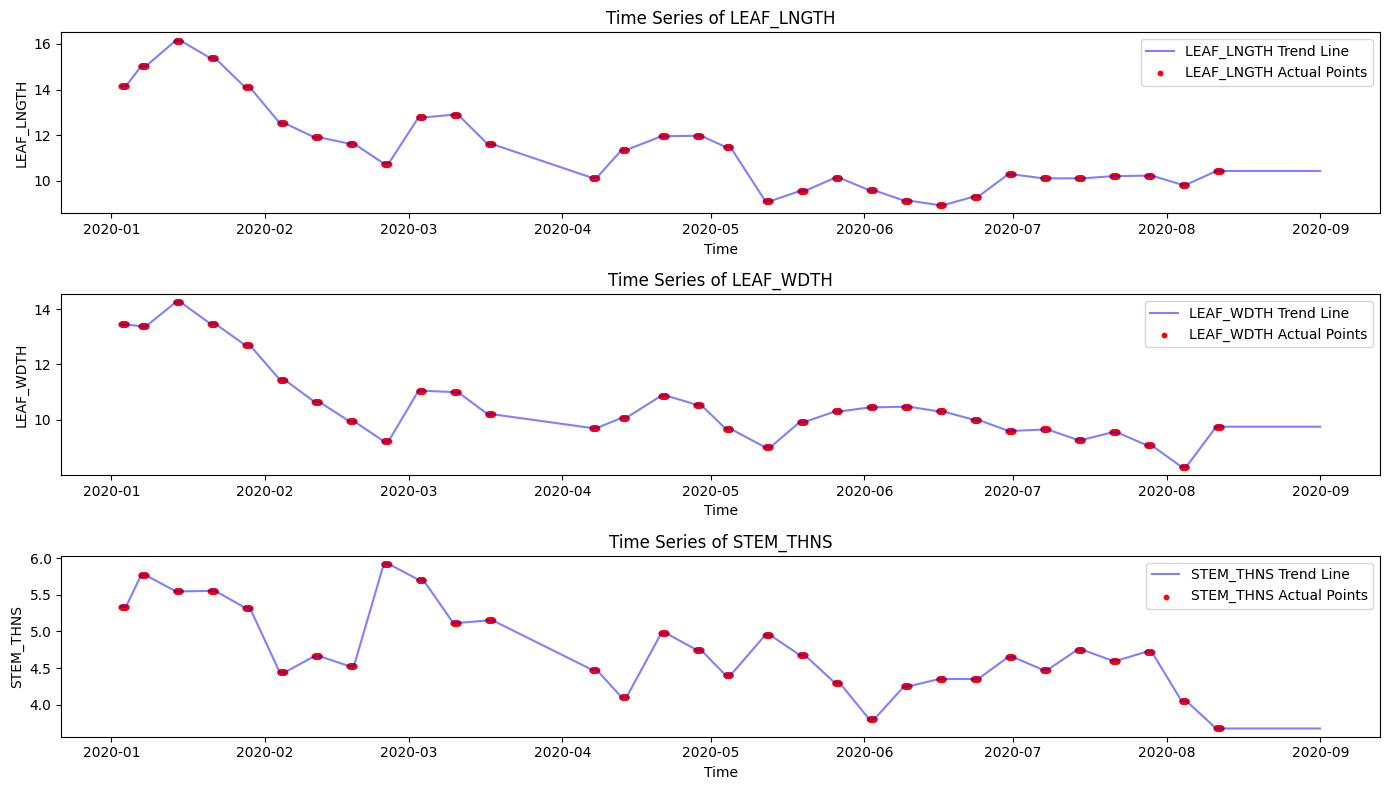

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 임시 선형 보간으로 결측치를 채움
df_interpolated = df_grouped.copy()
df_interpolated[growth_features] = df_interpolated[growth_features].interpolate(method='linear')

plt.figure(figsize=(14, 8))
for i, feature in enumerate(growth_features, 1):
    plt.subplot(len(growth_features), 1, i)
    # 보간된 선을 그림
    plt.plot(df_interpolated['MSRM_DT'], df_interpolated[feature], label=f'{feature} Trend Line', color='b', alpha=0.5)
    # 실제 데이터를 점으로 표시
    plt.scatter(df_grouped['MSRM_DT'], df_grouped[feature], label=f'{feature} Actual Points', color='r', s=10)
    plt.title(f'Time Series of {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

**그래프 분석**
-  각 생육 상태 변수는 전반적으로 부드럽게 감소하거나 완만한 변동을 보이며 비교적 연속적인 패턴을 가지고 있음
- 먼저 전후 값 보간으로 결측치가 긴 구간을 채워준 뒤, 스플라인 보간을 적용하여 부드러운 연결을 생성하는 방법을 사용할 것임

#### **2.6 출력 변수 - 스플라인 보간 + 전후 값 보간법으로 결측치 처리**

1. 먼저 전후 값 보간으로 결측치가 긴 구간을 채워준 뒤
2. 스플라인 보간을 적용하여 부드러운 연결을 생성

In [ ]:
# 1. 전후값 보간 (긴 결측 구간을 먼저 채움)
df_grouped[growth_features] = df_grouped[growth_features].ffill().bfill()

# 2. 스플라인 보간 (남은 짧은 결측 구간을 부드럽게 채움)
df_grouped[growth_features] = df_grouped[growth_features].interpolate(method='spline', order=3)

In [ ]:
df_grouped.isnull().sum()

,0
MSRM_DT,0
INNER_TPRT,0
INNER_HMDT,0
INNER_CBDX_CTRN,0
LEAF_LNGTH,0
LEAF_WDTH,0
STEM_THNS,0


In [ ]:
df_grouped

,MSRM_DT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,2020-01-01 00:00:00,14.1,63.0,776.0,14.150,13.45,5.335
1,2020-01-01 01:00:00,13.6,65.9,744.0,14.150,13.45,5.335
2,2020-01-01 02:00:00,12.9,67.3,725.0,14.150,13.45,5.335
3,2020-01-01 03:00:00,12.7,67.3,766.0,14.150,13.45,5.335
4,2020-01-01 04:00:00,12.0,64.3,774.0,14.150,13.45,5.335
...,...,...,...,...,...,...,...
5851,2020-08-31 19:00:00,35.3,63.5,575.0,10.425,9.75,3.675
5852,2020-08-31 20:00:00,35.3,63.5,575.0,10.425,9.75,3.675
5853,2020-08-31 21:00:00,35.3,63.5,575.0,10.425,9.75,3.675
5854,2020-08-31 22:00:00,35.3,63.5,575.0,10.425,9.75,3.675


In [ ]:
# 소숫점 둘째 자리까지만 나타내도록 변경
df_final = df_grouped.round(2)
df_final

,MSRM_DT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,LEAF_LNGTH,LEAF_WDTH,STEM_THNS
0,2020-01-01 00:00:00,14.1,63.0,776.0,14.15,13.45,5.34
1,2020-01-01 01:00:00,13.6,65.9,744.0,14.15,13.45,5.34
2,2020-01-01 02:00:00,12.9,67.3,725.0,14.15,13.45,5.34
3,2020-01-01 03:00:00,12.7,67.3,766.0,14.15,13.45,5.34
4,2020-01-01 04:00:00,12.0,64.3,774.0,14.15,13.45,5.34
...,...,...,...,...,...,...,...
5851,2020-08-31 19:00:00,35.3,63.5,575.0,10.42,9.75,3.68
5852,2020-08-31 20:00:00,35.3,63.5,575.0,10.42,9.75,3.68
5853,2020-08-31 21:00:00,35.3,63.5,575.0,10.42,9.75,3.68
5854,2020-08-31 22:00:00,35.3,63.5,575.0,10.42,9.75,3.68


In [ ]:
# 최종 dataset excel로 내보내기
df_final.to_excel("env_to_growth.xlsx")

---

## **3. Model Building**

#### **3.1 Goal**
- **prediction goal**: 내부 환경 변수(INNER_TPRT, INNER_HMDT, INNER_CBDX_CTRN)를 입력으로 사용하여 생육 상태 변수(LEAF_LNGTH, LEAF_WDTH, STEM_THNS)를 예측하는 것
- **dataset**: 시계열 데이터(5856 rows × 7 columns)
- **task**: regression

#### **3.2 Model Selection**
**1. ML model**
  - **랜덤 포레스트 (Random Forest)**
  - **그래디언트 부스팅 머신 (GBM) / XGBoost / LightGBM**

**2. DL model**
  - **LSTM (Long Short-Term Memory)**: 과거의 내부 환경 변수가 생육 상태에 영향을 미친다고 가정할 때, 시간적 의존성을 학습하는 데 적합함
  - **GRU (Gated Recurrent Unit)**: LSTM과 유사하지만 구조가 간단하고 학습 속도가 빠르고, 성능이 LSTM과 유사하게 우수할 수 있음
  - **1D CNN + LSTM 혼합 모델**: CNN은 시계열의 특징을 추출하고, LSTM은 시계열적 패턴을 학습함.  데이터가 충분히 많고 시계열 데이터가 복잡한 경우에 적합함

*** My approach**
  - 먼저 먼저 머신러닝 모델(예: 랜덤 포레스트, Gradient Boosting)을 사용하여 예측 성능을 확인해볼것임 (why? 일반적으로, 딥러닝 모델은 수천에서 수만 개 이상의 데이터가 필요하지만, 머신러닝 모델은 수백에서 수천 개의 데이터로도 충분히 좋은 성능 낼 수 있음)
  - 이후 성능이 충분하지 않다면 딥러닝 모델을 시도해볼것임

## **4. ML model**

#### **4.1 Random Forest Regressor**

- 랜덤 포레스트는 보통 단일 출력에 대해 동작함 -> 사이킷런의 MultiOutputRegressor를 사용하여 여러 출력 변수를 동시에 예측하도록 함
- MSRM_DT (측정일)에서 시간 정보를 추출해 추가 피처로 활용함 -> 이게 진짜 중요하고 성능 향상에도 도움 된 듯!!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
dataset = pd.read_excel("env_to_growth.xlsx")

# 입력 변수와 출력 변수 설정
env_features = ['INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']
growth_features = ['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']

# 시간 피처 추가
dataset['hour'] = pd.to_datetime(dataset['MSRM_DT']).dt.hour
dataset['day'] = pd.to_datetime(dataset['MSRM_DT']).dt.day
dataset['month'] = pd.to_datetime(dataset['MSRM_DT']).dt.month

# 새로운 입력 피처 리스트
input_features = env_features + ['hour', 'day', 'month']

# 입력 변수(X)와 출력 변수(y) 분리
X = dataset[input_features]
y = dataset[growth_features]

# 데이터 정규화 (입력 변수와 출력 변수 각각)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 정의 및 멀티아웃풋 래퍼 적용
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)

# 모델 학습
multi_rf.fit(X_train, y_train)

# 예측
y_pred = multi_rf.predict(X_test)

# 예측값 역정규화
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# 성능 평가
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

# 각 출력 변수별 R² Score 확인
for i, feature in enumerate(growth_features):
    mae_feature = mean_absolute_error(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    mse_feature = mean_squared_error(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    r2_feature = r2_score(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    print(f"\n{feature} - MAE: {mse_feature}")
    print(f"{feature} - MSE: {mse_feature}")
    print(f"{feature} - R² Score: {r2_feature}")

MAE: 0.00076544368600906
MSE: 9.108983788395945e-05
R² Score: 0.9999726533323557

LEAF_LNGTH - MAE: 0.00027121799488054733
LEAF_LNGTH - MSE: 0.00027121799488054733
LEAF_LNGTH - R² Score: 0.9999206492317076

LEAF_WDTH - MAE: 1.2773805460748817e-06
LEAF_WDTH - MSE: 1.2773805460748817e-06
LEAF_WDTH - R² Score: 0.9999993545953636

STEM_THNS - MAE: 7.741382252561702e-07
STEM_THNS - MSE: 7.741382252561702e-07
STEM_THNS - R² Score: 0.9999979561699958


**결과 분석**
- 결과가 매우 좋게 나옴. 각 생육 상태 변수에 대한 R² 스코어가 거의 1에 가까우며, **Mean Squared Error (MSE)**도 아주 낮게 나왔기 때문에, 모델이 각 생육 상태 변수를 매우 정확하게 예측하고 있음.
  - 전체 R² 스코어: 0.99997에 달하는 높은 값으로, 모델이 전체적으로 출력 변수의 변동성을 거의 완벽하게 설명하고 있음
  - 개별 R² 스코어: LEAF_LNGTH는 0.9999 이상, LEAF_WDTH와 STEM_THNS는 거의 완벽한 0.99999 이상으로, 모든 변수에 대해 아주 우수한 예측 성능을 보임